In [12]:
from PIL import Image, ImageFont, ImageDraw, ImageFilter, ImageStat

from ChemPageSegmentationDatasetCreator import ChemPageSegmentationDatasetCreator as CPSD_creator

## Generation of a single structure depiction with polygon coordinates around the chemical structure

In [13]:
smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
dataset_creator = CPSD_creator([smiles], load_PLN_annotations=True)


In [14]:
# dataset_creator.PLN_annotations
# if dataset_creator.PLN_page_annotation_iterator:
#     print(next(dataset_creator.PLN_page_annotation_iterator))
# print(next(dataset_creator.smiles_iterator))

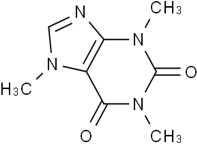

In [15]:
image, annotation = dataset_creator.generate_structure_and_annotation(smiles)
image

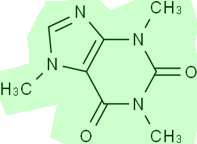

In [16]:
annotation
x_coords = annotation[0]['shape_attributes']['all_points_x']
y_coords = annotation[0]['shape_attributes']['all_points_y']
polygon = [(x_coords[n], y_coords[n]) for n in range(len(x_coords))]
draw = ImageDraw.Draw(image, 'RGBA')
draw.polygon(polygon, fill = (0,255,0,50))
image


## Generation of a single structure depiction and an ID label with polygon coordinates around both elements

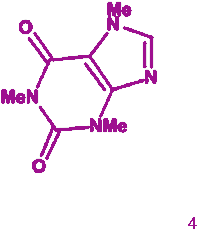

In [17]:
image, annotation = dataset_creator.generate_structure_and_annotation(smiles, label=True)
image


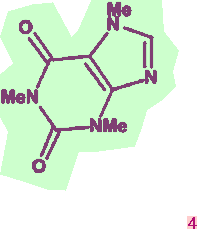

In [18]:
colour_dict = {
    'chemical_structure': (0,255,0,50),
    'chemical_ID': (255,0,0,50),
}
for region in annotation:
    x_coords = region['shape_attributes']['all_points_x']
    y_coords = region['shape_attributes']['all_points_y']
    polygon = [(x_coords[n], y_coords[n]) for n in range(len(x_coords))]
    draw = ImageDraw.Draw(image, 'RGBA')
    colour = colour_dict[region['region_attributes']['type']]
    draw.polygon(polygon, fill = colour)

image

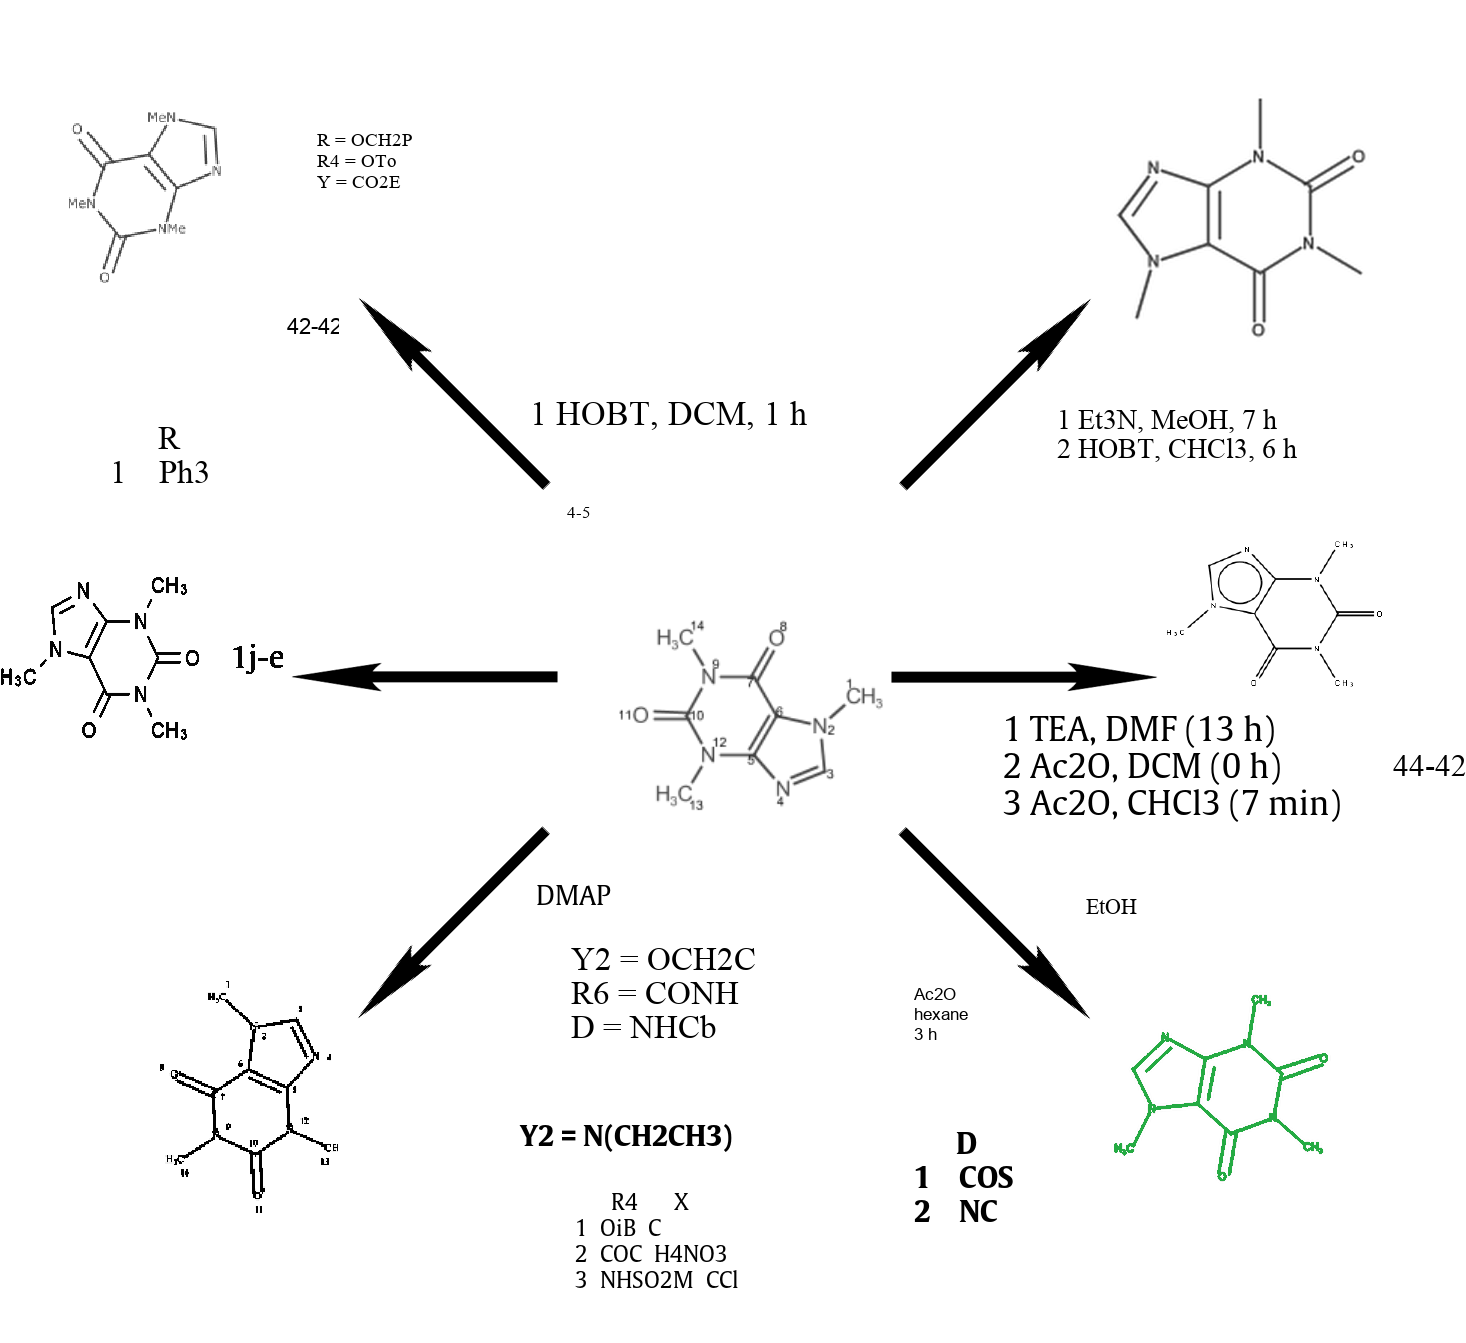

In [19]:
image, annotation = dataset_creator.create_reaction_scheme()
image

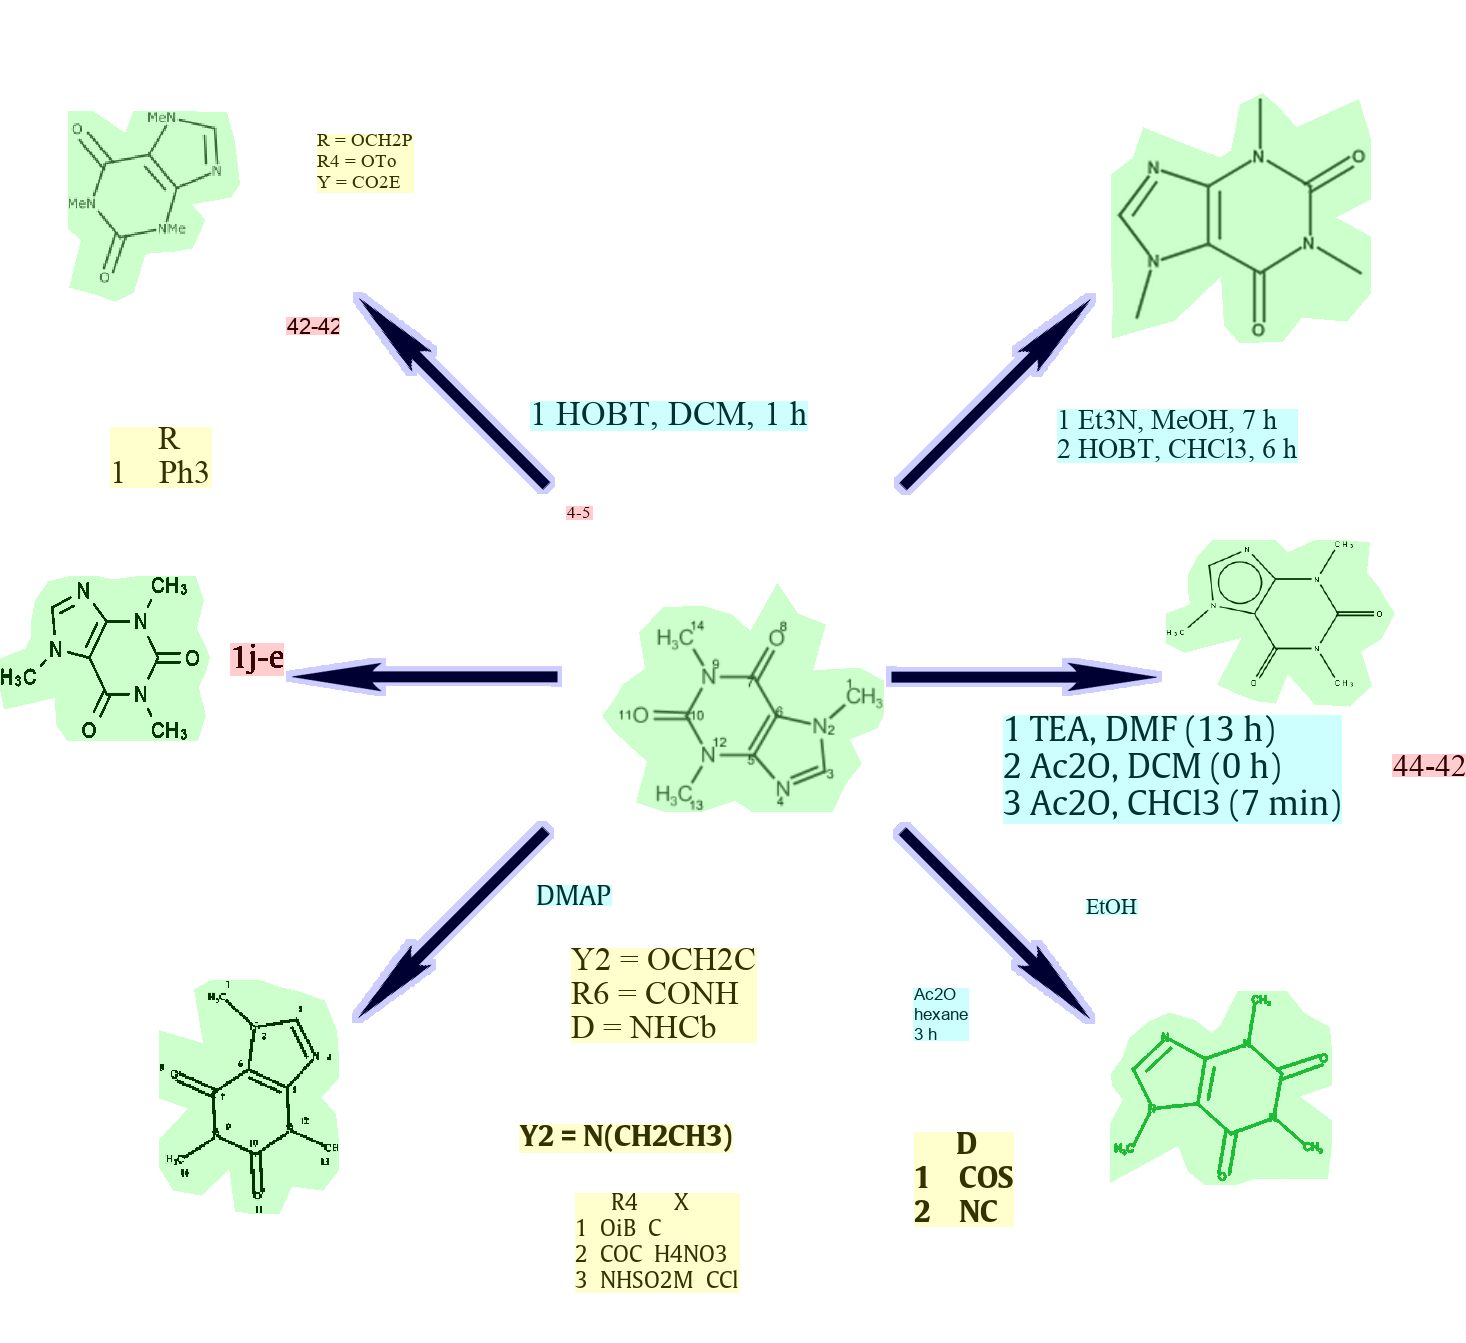

In [20]:
colour_dict = {
    'chemical_structure': (0,255,0,50),
    'chemical_ID': (255,0,0,50),
    'arrow': (0,0,255,50),
    'R_group_label': (255,255,0,50),
    'reaction_condition_label': (0,255,255,50)
}
annotation
for region in annotation:
    x_coords = region['shape_attributes']['all_points_x']
    y_coords = region['shape_attributes']['all_points_y']
    polygon = [(x_coords[n], y_coords[n]) for n in range(len(x_coords)) if len]
    draw = ImageDraw.Draw(image, 'RGBA')
    colour = colour_dict[region['region_attributes']['type']]
    draw.polygon(polygon, fill = colour)

image

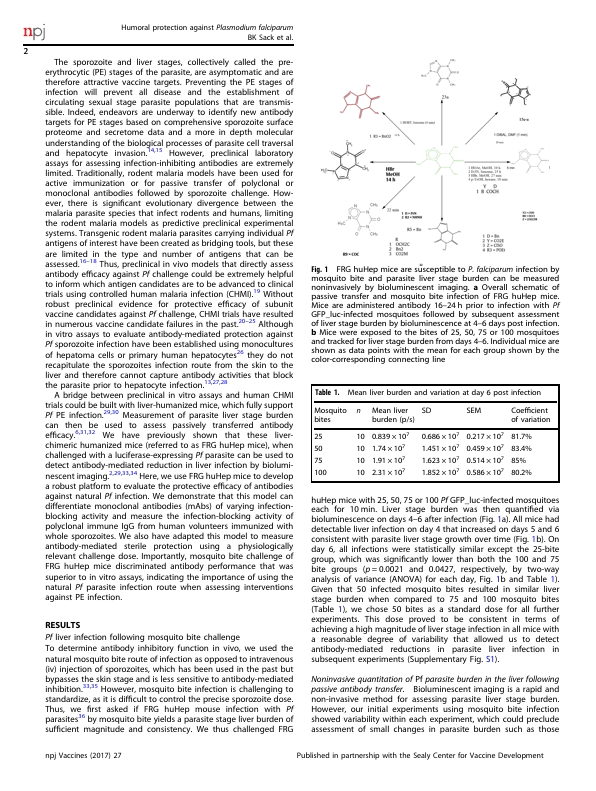

In [25]:
image, annotation = dataset_creator.CreateChemPage()

#next(dataset_creator.PLN_page_annotation_iterator)
#dataset_creator.PLN_annotations
image

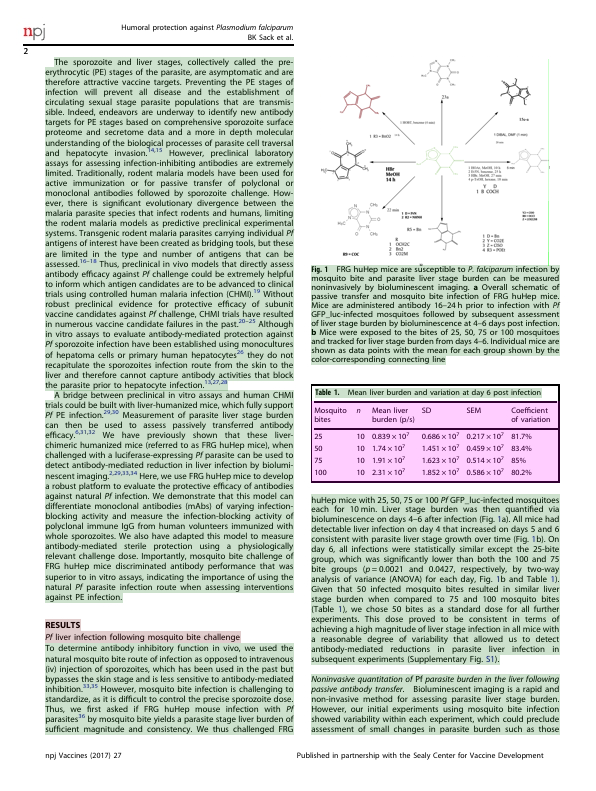

In [26]:
colour_dict = {
    'chemical_structure': (0,255,0,50),
    'chemical_ID': (255,0,0,50),
    'arrow': (0,0,255,50),
    'R_group_label': (255,255,0,50),
    'reaction_condition_label': (0,255,255,50),
    'table': (255,0,255,50),
    'text': (0,100,0,50),
    'title': (100,0,0,50)
    
}

for region in annotation['regions']:
    x_coords = region['shape_attributes']['all_points_x']
    y_coords = region['shape_attributes']['all_points_y']
    polygon = [(x_coords[n], y_coords[n]) for n in range(len(x_coords)) if len]
    draw = ImageDraw.Draw(image, 'RGBA')
    colour = colour_dict[region['region_attributes']['type']]
    draw.polygon(polygon, fill = colour)

image